In [339]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [89]:
prices = pd.read_csv("prices.csv")
fundamentals = pd.read_csv("fundamentals.csv")
securities = pd.read_csv("securities.csv")
prices_adj = pd.read_csv("prices-split-adjusted.csv")

In [90]:
prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [91]:
fundamentals.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [92]:
securities.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [93]:
prices_adj

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
5,2016-01-12,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0
6,2016-01-13,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0
7,2016-01-14,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0
8,2016-01-15,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0
9,2016-01-19,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0


In [345]:
prices = prices.loc[prices['symbol'] == "WLTW"]
prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [95]:
fundamentals = fundamentals.loc[fundamentals["Ticker Symbol"] == "WLTW"]
fundamentals.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
1694,1694,WLTW,2012-12-31,19000000.0,-17000000.0,16000000.0,26.0,-135000000.0,1.125000e+09,NaN,...,0.0,0.0,1.699000e+09,1.341300e+10,1.511200e+10,3.480000e+09,-3000000.0,2012.0,NaN,NaN
1695,1695,WLTW,2013-12-31,21000000.0,-116000000.0,-38000000.0,16.0,-112000000.0,1.316000e+09,NaN,...,0.0,0.0,2.215000e+09,1.258500e+10,1.480000e+10,3.655000e+09,-3000000.0,2013.0,NaN,NaN
1696,1696,WLTW,2014-12-31,33000000.0,-66000000.0,6000000.0,18.0,-113000000.0,1.524000e+09,NaN,...,0.0,0.0,1.985000e+09,1.343600e+10,1.542100e+10,3.802000e+09,-3000000.0,2014.0,NaN,NaN
1697,1697,WLTW,2015-12-31,45000000.0,-155000000.0,55000000.0,17.0,-146000000.0,1.672000e+09,NaN,...,0.0,0.0,2.229000e+09,1.661000e+10,1.883900e+10,3.829000e+09,-3000000.0,2015.0,NaN,NaN


In [96]:
securities = securities.loc[securities["Ticker symbol"] == "WLTW"]
securities.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
492,WLTW,Willis Towers Watson,reports,Financials,Insurance Brokers,"London, United Kingdom",2016-01-05,1140536


In [97]:
prices_adj = prices_adj.loc[prices_adj["symbol"] == "WLTW"]
prices_adj.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [98]:
prices_train = prices.loc[0:200]
prices_test = prices.loc[201:]

In [351]:
X = prices_train.iloc[:-1,3:6].values
Y = prices_train.iloc[1:,2].values
clf = GradientBoostingRegressor(n_estimators=100000, learning_rate=0.1, max_depth=1, random_state=0, loss='ls')
print(Y)
clf.fit(X, Y)

[125.239998 116.379997 115.480003 117.010002 115.510002 116.459999
 113.510002 113.330002 113.660004 109.059998 109.730003 111.879997
 111.32     110.419998 110.769997 110.900002 113.349998 114.
 113.25     113.379997 114.080002 115.120003 113.300003 111.169998
 106.730003 105.629997 108.559998 109.110001 110.830002 111.120003
 111.370003 111.360001 112.370003 110.769997 111.599998 113.339996
 113.040001 114.269997 115.349998 116.489998 116.610001 116.050003
 116.5      117.050003 116.910004 117.93     120.419998 119.839996
 120.349998 121.010002 124.25     120.860001 121.029999 121.470001
 118.889999 119.510002 117.989998 118.400002 118.779999 118.080002
 119.660004 116.400002 114.089996 114.739998 114.879997 114.110001
 114.989998 115.809998 118.160004 117.5      118.32     121.349998
 121.099998 122.610001 123.480003 123.199997 123.959999 124.589996
 123.540001 123.800003 125.440002 124.559998 125.389999 126.660004
 127.360001 122.279999 123.889999 125.699997 124.440002 123.910004
 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100000, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [130]:
X_val = prices_test.iloc[:-1,3:6].values
Y_val = prices_test.iloc[1:,2].values
y_pred = clf.predict(X_val)
print(y_pred)

[128.22921001 128.28512173 126.30694168 127.312739   125.26028333
 125.71926031 125.21054229 124.64563636 123.68864983 123.12794534
 123.46675412 115.82899574 117.62485112 119.08981424 117.89209015
 123.11424995 121.73073111 122.620019   123.41730175 122.31391138
 124.94979665 125.1216511  123.39633168 124.86626001 122.36982857
 126.94132522 124.67050689 124.63428308 123.42244525 120.55302224
 118.94068386 121.82146613 123.91589318 121.71578351 122.16027351
 122.28664071 121.50355744 124.14011103 121.76976241 122.36105638
 122.25837789 123.92267605 123.96333211 123.24246687 122.72659109
 125.49444835 124.72715047 122.14821686 121.863002  ]


In [129]:
r2_score(Y_val, y_pred)

0.6289677869746751

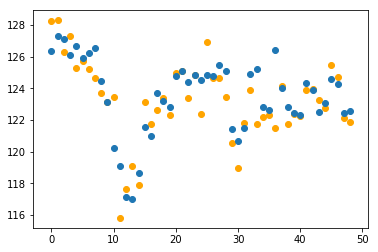

In [146]:
import matplotlib.pyplot as plt
plt.scatter(x=range(0,49), y=y_pred, color = 'orange')
plt.scatter(x=range(0,49), y=Y_val)

In [148]:
movementReal = list()
movementPred = list()
prevReal = Y_val[0]
prevPred = y_pred[0]
for i in range(len(y_pred)):
    if y_pred[i] > prevPred:
        movementPred.append(1)
    elif y_pred[i] < prevPred:
        movementPred.append(-1)
    elif y_pred[i] == prevPred:
        movementPred.append(0)
        
    if Y_val[i] > prevReal:
        movementReal.append(1)
    elif Y_val[i] < prevReal:
        movementReal.append(-1)
    elif Y_val[i] == prevReal:
        movementReal.append(0)
        
    prevPred = y_pred[i]
    prevReal = Y_val[i]

count = 0
for i in range(len(movementReal)):
    if movementReal[i] != movementPred[i]:
        count += 1

count

20

# With the big dataset:

In [318]:
data = pd.read_csv("MMM.csv")

In [319]:
data.head(7)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2009,57.549999,59.389999,57.520000,59.189999,45.690918,5313900.0
1,1/5/2009,58.790001,59.090000,58.110001,58.500000,45.158264,3768800.0
2,1/6/2009,58.740002,59.810001,58.610001,59.189999,45.690918,4966200.0
3,1/7/2009,58.610001,58.959999,57.580002,58.070000,44.826347,4598100.0
4,1/8/2009,57.680000,58.709999,57.450001,58.580002,45.220032,3944900.0
5,1/9/2009,58.799999,59.009998,57.570000,57.740002,44.571594,3661000.0
6,1/12/2009,57.639999,57.900002,56.689999,57.080002,44.062122,4182500.0


In [320]:
data = data.dropna()

In [321]:
data["Date"] = pd.to_datetime(data["Date"])

In [322]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,57.549999,59.389999,57.520000,59.189999,45.690918,5313900.0
1,2009-01-05,58.790001,59.090000,58.110001,58.500000,45.158264,3768800.0
2,2009-01-06,58.740002,59.810001,58.610001,59.189999,45.690918,4966200.0
3,2009-01-07,58.610001,58.959999,57.580002,58.070000,44.826347,4598100.0
4,2009-01-08,57.680000,58.709999,57.450001,58.580002,45.220032,3944900.0


In [323]:
dates = data.iloc[:,0]
dates = pd.DataFrame({"year": dates.dt.year,
              "month": dates.dt.month,
                "day": dates.dt.day,
                 "dayofyear": dates.dt.dayofyear,
                 "week": dates.dt.week,
                 "weekofyear": dates.dt.weekofyear,
                 "dayofweek": dates.dt.dayofweek,
                 "weekday": dates.dt.weekday,
                 "quarter": dates.dt.quarter})

In [327]:
data = pd.concat([data, dates], axis=1)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,dayofyear,week,weekofyear,dayofweek,weekday,quarter
0,2009-01-02,57.549999,59.389999,57.520000,59.189999,45.690918,5313900.0,2009,1,2,2,1,1,4,4,1
1,2009-01-05,58.790001,59.090000,58.110001,58.500000,45.158264,3768800.0,2009,1,5,5,2,2,0,0,1
2,2009-01-06,58.740002,59.810001,58.610001,59.189999,45.690918,4966200.0,2009,1,6,6,2,2,1,1,1
3,2009-01-07,58.610001,58.959999,57.580002,58.070000,44.826347,4598100.0,2009,1,7,7,2,2,2,2,1
4,2009-01-08,57.680000,58.709999,57.450001,58.580002,45.220032,3944900.0,2009,1,8,8,2,2,3,3,1


In [328]:
train_length = int(len(data) * .8)
train = data.loc[0:train_length]
test = data.loc[train_length + 1:]

In [329]:
X = train.iloc[:,2:].values
Y = train.iloc[:,1].values
X_new = []
Y_new = []
deltaVal = 10
for i in range(len(X) - deltaVal-1):
    delt_row = X[i:i+deltaVal]
    delt_row = delt_row.ravel()
    X_new.append(delt_row)
    Y_new.append(Y[i+deltaVal+1])
X_new = np.array(X_new)
Y_new = np.array(Y_new)

In [330]:
#plt.scatter(x=X_new[0], y=Y_new, color = 'orange')
print(X)

[[ 59.389999  57.52      59.189999 ...   4.         4.         1.      ]
 [ 59.09      58.110001  58.5      ...   0.         0.         1.      ]
 [ 59.810001  58.610001  59.189999 ...   1.         1.         1.      ]
 ...
 [179.199997 178.570007 178.919998 ...   1.         1.         4.      ]
 [179.449997 178.020004 178.080002 ...   2.         2.         4.      ]
 [179.139999 178.029999 178.410004 ...   3.         3.         4.      ]]


In [340]:
#clf = linear_model.LinearRegression()
clf = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, bootstrap=True, max_features=0.5)
clf.fit(X_new, Y_new)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [341]:
X_val = test.iloc[:,2:].values
Y_val = test.iloc[:,1].values
X_new_val = []
Y_new_val = []
for i in range(len(X_val) - deltaVal-1):
    delt_row = X_val[i:i+deltaVal]
    delt_row = delt_row.ravel()
    X_new_val.append(delt_row)
    Y_new_val.append(Y_val[i+deltaVal+1])
X_new_val = np.array(X_new_val)
Y_new_val = np.array(Y_new_val)


Y_pred = clf.predict(X_new_val)
for i in Y_pred:
    print(i)

177.6678544165476
177.9212846054762
179.72186860119544
179.69668046052317
179.59667516044377
179.1027782019616
177.19751364519004
177.9833909837912
177.89646718545637
178.07462805933534
177.38243874155125
175.2465693822457
175.3527530639757
173.2212667884697
174.51486714517245
175.8094696110455
177.5231284056388
178.08326036189487
178.956987099122
180.32744014404494
180.88809508291396
180.95426950496756
180.88385645508663
180.7839089892052
180.72676973520566
180.36519714354174
179.6872402085417
179.13599796750003
179.2258487169048
179.19395801869052
179.20907842651792
179.23961950440486
179.2099251128572
179.1570389041072
179.3141788946727
179.30084911291672
179.1518972409822
179.10846191270838
179.34579759750002
179.30925529148814
179.29499247065482
179.32284735583337
179.28411819125003
179.17189361357148
179.29188705488102
179.246165993631
179.20247691898814
179.1734751280655
179.1778203322322
179.25969295729172
179.29528309791672
179.19732534916673
179.15641709145837
179.20230589125

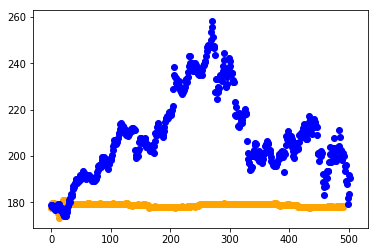

In [342]:
plt.scatter(x=range(len(Y_pred)), y=Y_pred, color = 'orange')
plt.scatter(x=range(len(Y_val)), y=Y_val, color = 'blue')

In [338]:
movementReal = list()
movementPred = list()
prevReal = Y_val[0]
prevPred = Y_pred[0]
for i in range(len(Y_pred)):
    if Y_pred[i] > prevPred:
        movementPred.append(1)
    elif Y_pred[i] < prevPred:
        movementPred.append(-1)
    elif Y_pred[i] == prevPred:
        movementPred.append(0)
        
    if Y_val[i] > prevReal:
        movementReal.append(1)
    elif Y_val[i] < prevReal:
        movementReal.append(-1)
    elif Y_val[i] == prevReal:
        movementReal.append(0)
        
    prevPred = Y_pred[i]
    prevReal = Y_val[i]

count = 0
for i in range(len(movementReal)):
    if movementReal[i] != movementPred[i]:
        count += 1

count / len(Y_val)

0.47713717693836977